# Exploring 311 dataset for department resource utilization

## Analyzing using Holiday dataset from 2020 to 2023

Holidays act as major trendsetter for 311 complaints, as it is during this time most of the people are a little carefree thus resulting in more complaints. We wanted to see if there were any correlation with the 311 complaint dataset and as part of that compiled a holiday dataset from various sources and augmented on the 311 dataset to see if we could find any trends.

In [1]:
import pandas as pd

# Specify the path to your Excel file
excel_file_path = '2010-2020 Holiday Dates.xlsx'

# Specify the sheet name you want to read
sheet_name_to_read = 'HolidayDateList'  # Replace 'Sheet1' with the actual sheet name

# Read the specified sheet into a DataFrame
df_holidays = pd.read_excel(excel_file_path, sheet_name=sheet_name_to_read)

# Now 'df' contains the data from the specified sheet

In [2]:
df_holidays

,DAY_DATE,DAY_INT,HOLIDAY_NAME,WEEKDAY,HOLIDAY_DATE_SRC,IS_HOL,IS_FRB_BANK_OBS_HOL,IS_NYSE_OBS_HOL,IS_US_FEDERAL_OBS_HOL
0,2010-01-01,20100101,New Year's Day,Friday,https://www.timeanddate.com/holidays/us/new-ye...,1,1,1,1
1,2010-01-18,20100118,Martin Luther King Day,Monday,https://www.timeanddate.com/holidays/us/martin...,1,1,1,1
2,2010-02-15,20100215,Presidents' Day,Monday,https://www.timeanddate.com/holidays/us/washin...,1,1,1,1
3,2010-04-02,20100402,Good Friday,Friday,https://www.timeanddate.com/holidays/us/good-f...,1,0,1,0
4,2010-05-31,20100531,Memorial Day,Monday,https://www.timeanddate.com/holidays/us/memori...,1,1,1,1
...,...,...,...,...,...,...,...,...,...
128,2020-09-07,20200907,Labor Day,Monday,https://www.timeanddate.com/holidays/us/labor-day,1,1,1,1
129,2020-10-12,20201012,Columbus Day,Monday,https://www.timeanddate.com/holidays/us/columb...,1,1,0,1
130,2020-11-11,20201111,Veterans Day,Wednesday,https://www.timeanddate.com/holidays/us/vetera...,1,1,0,1
131,2020-11-26,20201126,Thanksgiving Day,Thursday,https://www.timeanddate.com/holidays/us/thanks...,1,1,1,1


In [15]:
excel_file_path = 'holi_2021.xlsx'
sheet_name_to_read = 'United States 2021 Holidays'
df_holidays_2021 = pd.read_excel(excel_file_path, sheet_name=sheet_name_to_read, header=1)

excel_file_path = 'holi_2022.xlsx'
sheet_name_to_read = 'United States 2022 Holidays'
df_holidays_2022 = pd.read_excel(excel_file_path, sheet_name=sheet_name_to_read, header=1)

excel_file_path = 'holi_2023.xlsx'
sheet_name_to_read = 'United States 2023 Holidays'
df_holidays_2023 = pd.read_excel(excel_file_path, sheet_name=sheet_name_to_read, header=1)

In [18]:
df_holidays_2021

,DATE,Unnamed: 1,NAME OF HOLIDAY
0,2021-01-01,Friday,New Year's Day
1,2021-01-18,Monday,Martin Luther King Jr. Day
2,2021-02-14,Sunday,Valentine's Day
3,2021-02-15,Monday,Washington's Birthday
4,2021-03-17,Wednesday,St. Patrick's Day
5,2021-04-04,Sunday,Easter Sunday
6,2021-04-15,Thursday,Tax Day
7,2021-04-21,Wednesday,Administrative Professionals Day
8,2021-05-09,Sunday,Mother's Day
9,2021-05-31,Monday,Memorial Day


In [19]:
df_holidays_2021_2023 = pd.concat([df_holidays_2021, df_holidays_2022, df_holidays_2023], ignore_index=True)
df_holidays_2021_2023

,DATE,Unnamed: 1,NAME OF HOLIDAY
0,2021-01-01,Friday,New Year's Day
1,2021-01-18,Monday,Martin Luther King Jr. Day
2,2021-02-14,Sunday,Valentine's Day
3,2021-02-15,Monday,Washington's Birthday
4,2021-03-17,Wednesday,St. Patrick's Day
...,...,...,...
69,2023-11-23,Thursday,Thanksgiving Day
70,2023-11-24,Friday,Day after Thanksgiving Day
71,2023-12-24,Sunday,Christmas Eve
72,2023-12-25,Monday,Christmas Day


In [20]:
df_holidays_2021_2023.dtypes

 DATE                 datetime64[ns]
Unnamed: 1                    object
   NAME OF HOLIDAY            object
dtype: object

In [24]:
df_holidays_2021_2023['IS_HOL'] = 1
df_holidays_2021_2023

,DATE,Day_of_week,NAME OF HOLIDAY,IS_HOL
0,2021-01-01,Friday,New Year's Day,1
1,2021-01-18,Monday,Martin Luther King Jr. Day,1
2,2021-02-14,Sunday,Valentine's Day,1
3,2021-02-15,Monday,Washington's Birthday,1
4,2021-03-17,Wednesday,St. Patrick's Day,1
...,...,...,...,...
69,2023-11-23,Thursday,Thanksgiving Day,1
70,2023-11-24,Friday,Day after Thanksgiving Day,1
71,2023-12-24,Sunday,Christmas Eve,1
72,2023-12-25,Monday,Christmas Day,1


In [27]:
df_holidays_2021_2023

,DATE,Day_of_week,NAME OF HOLIDAY,IS_HOL
0,2021-01-01,Friday,New Year's Day,1
1,2021-01-18,Monday,Martin Luther King Jr. Day,1
2,2021-02-14,Sunday,Valentine's Day,1
3,2021-02-15,Monday,Washington's Birthday,1
4,2021-03-17,Wednesday,St. Patrick's Day,1
...,...,...,...,...
69,2023-11-23,Thursday,Thanksgiving Day,1
70,2023-11-24,Friday,Day after Thanksgiving Day,1
71,2023-12-24,Sunday,Christmas Eve,1
72,2023-12-25,Monday,Christmas Day,1


In [33]:
df_holidays_2021_2023.columns

Index([' DATE', 'Day_of_week', '   NAME OF HOLIDAY', 'IS_HOL'], dtype='object')

In [34]:
new_column_names = {' DATE': 'DATE'}
df_holidays_2021_2023.rename(columns=new_column_names, inplace=True)
columns_to_keep = ['DATE', 'IS_HOL']
df_holidays_2021_2023 = df_holidays_2021_2023[columns_to_keep]
df_holidays_2021_2023

,DATE,IS_HOL
0,2021-01-01,1
1,2021-01-18,1
2,2021-02-14,1
3,2021-02-15,1
4,2021-03-17,1
...,...,...
69,2023-11-23,1
70,2023-11-24,1
71,2023-12-24,1
72,2023-12-25,1


In [23]:
columns_to_keep = ['DAY_DATE', 'IS_HOL']
df_holidays = df_holidays[columns_to_keep]
df_holidays

,DAY_DATE,IS_HOL
0,2010-01-01,1
1,2010-01-18,1
2,2010-02-15,1
3,2010-04-02,1
4,2010-05-31,1
...,...,...
128,2020-09-07,1
129,2020-10-12,1
130,2020-11-11,1
131,2020-11-26,1


In [26]:
new_column_names = {'DAY_DATE': 'DATE'}
df_holidays.rename(columns=new_column_names, inplace=True)
df_holidays

/var/folders/_v/_mny5y2n1bdbb4s8ccn4szmc0000gn/T/ipykernel_8751/3186843242.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_holidays.rename(columns=new_column_names, inplace=True)


,DATE,IS_HOL
0,2010-01-01,1
1,2010-01-18,1
2,2010-02-15,1
3,2010-04-02,1
4,2010-05-31,1
...,...,...
128,2020-09-07,1
129,2020-10-12,1
130,2020-11-11,1
131,2020-11-26,1


In [35]:
df = pd.concat([df_holidays, df_holidays_2021_2023], ignore_index=True)
df

,DATE,IS_HOL
0,2010-01-01,1
1,2010-01-18,1
2,2010-02-15,1
3,2010-04-02,1
4,2010-05-31,1
...,...,...
202,2023-11-23,1
203,2023-11-24,1
204,2023-12-24,1
205,2023-12-25,1


In [36]:
df.to_csv('holidays.csv', index=False)

# Holiday data analysis 

In [56]:
import pandas as pd

# Replace 'your_file.csv' with the actual path to your CSV file
csv_file_path = '311_Service_Requests.csv'

# Specify the date range
start_date = '2020-01-01'
end_date = '2023-12-31'

# Initialize an empty list to store chunks of data
chunks = []

# Specify the chunk size (adjust as needed)
chunk_size = 10000

# Iterate through the chunks of the CSV file
for chunk in pd.read_csv(csv_file_path, chunksize=chunk_size):
    # Convert 'Created Date' to datetime format
    chunk['Created Date'] = pd.to_datetime(chunk['Created Date'], format='%m/%d/%Y %I:%M:%S %p', errors='coerce')
    
    # Filter rows based on the date range
    chunk_filtered = chunk[(chunk['Created Date'] >= start_date) & (chunk['Created Date'] <= end_date)]
    
    # Append the filtered chunk to the list
    chunks.append(chunk_filtered)

# Concatenate all the filtered chunks into a single DataFrame
df_filtered = pd.concat(chunks, ignore_index=True)

# Display the resulting DataFrame
print(df_filtered)


          Unique Key        Created Date             Closed Date Agency  \
0           53293386 2022-02-07 14:51:25  02/28/2022 07:55:39 AM    HPD   
1           53293389 2022-02-07 11:54:28  09/01/2022 12:00:00 AM   DSNY   
2           53293390 2022-02-07 11:20:01  03/03/2022 04:24:30 PM    HPD   
3           53293391 2022-02-07 15:07:51  02/08/2022 12:00:00 AM    DOB   
4           53293395 2022-02-07 07:56:44  02/07/2022 08:02:10 AM   NYPD   
...              ...                 ...                     ...    ...   
11884614    53293381 2022-02-07 12:44:19  03/24/2022 07:27:38 AM    HPD   
11884615    53293382 2022-02-07 15:04:38  03/04/2022 08:18:09 AM    HPD   
11884616    53293383 2022-02-07 08:59:26  03/03/2022 08:29:18 PM    HPD   
11884617    53293384 2022-02-07 09:36:00  02/07/2022 11:12:00 AM    DEP   
11884618    53293385 2022-02-07 17:38:10  09/14/2022 02:45:57 PM    HPD   

                                                Agency Name  \
0         Department of Housing Pres

In [57]:
df_filtered

,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,...,Vehicle Type,Taxi Company Borough,Taxi Pick Up Location,Bridge Highway Name,Bridge Highway Direction,Road Ramp,Bridge Highway Segment,Latitude,Longitude,Location
0,53293386,2022-02-07 14:51:25,02/28/2022 07:55:39 AM,HPD,Department of Housing Preservation and Develop...,WATER LEAK,SLOW LEAK,RESIDENTIAL BUILDING,10453.0,170 WEST BURNSIDE AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.854288,-73.915670,"(40.85428831604737, -73.91566990170884)"
1,53293389,2022-02-07 11:54:28,09/01/2022 12:00:00 AM,DSNY,Department of Sanitation,Graffiti,Graffiti,Comercial,11203.0,1265 UTICA AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.641500,-73.929275,"(40.64149990432996, -73.92927461265595)"
2,53293390,2022-02-07 11:20:01,03/03/2022 04:24:30 PM,HPD,Department of Housing Preservation and Develop...,UNSANITARY CONDITION,PESTS,RESIDENTIAL BUILDING,10474.0,1275 LAFAYETTE AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.816643,-73.888326,"(40.81664330417759, -73.88832554199675)"
3,53293391,2022-02-07 15:07:51,02/08/2022 12:00:00 AM,DOB,Department of Buildings,Building/Use,Zoning - Non-Conforming/Illegal Vehicle Storage,NaN,11221.0,1010 BUSHWICK AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.691620,-73.921890,"(40.69162027336148, -73.92189045051772)"
4,53293395,2022-02-07 07:56:44,02/07/2022 08:02:10 AM,NYPD,New York City Police Department,Noise - Vehicle,Engine Idling,Street/Sidewalk,11203.0,275 EAST 48 STREET,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.655481,-73.932723,"(40.655481159385765, -73.93272327907549)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11884614,53293381,2022-02-07 12:44:19,03/24/2022 07:27:38 AM,HPD,Department of Housing Preservation and Develop...,WATER LEAK,SLOW LEAK,RESIDENTIAL BUILDING,11203.0,751 TROY AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.654748,-73.936512,"(40.654747711387884, -73.93651182977864)"
11884615,53293382,2022-02-07 15:04:38,03/04/2022 08:18:09 AM,HPD,Department of Housing Preservation and Develop...,WATER LEAK,SLOW LEAK,RESIDENTIAL BUILDING,11215.0,359 12 STREET,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.665903,-73.984742,"(40.665902537397336, -73.98474169246217)"
11884616,53293383,2022-02-07 08:59:26,03/03/2022 08:29:18 PM,HPD,Department of Housing Preservation and Develop...,WATER LEAK,SLOW LEAK,RESIDENTIAL BUILDING,10033.0,31 BENNETT AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.852320,-73.935683,"(40.8523195336831, -73.93568344428844)"
11884617,53293384,2022-02-07 09:36:00,02/07/2022 11:12:00 AM,DEP,Department of Environmental Protection,Water Conservation,Water Meter Stolen/Missing - Private Residence...,NaN,10314.0,177 MERRYMOUNT STREET,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.589542,-74.159793,"(40.58954219199396, -74.15979328513913)"


In [59]:
df_filtered.dtypes

Unique Key                                 int64
Created Date                      datetime64[ns]
Closed Date                               object
Agency                                    object
Agency Name                               object
Complaint Type                            object
Descriptor                                object
Location Type                             object
Incident Zip                              object
Incident Address                          object
Street Name                               object
Cross Street 1                            object
Cross Street 2                            object
Intersection Street 1                     object
Intersection Street 2                     object
Address Type                              object
City                                      object
Landmark                                  object
Facility Type                             object
Status                                    object
Due Date            

In [61]:
df_filtered.to_csv('data_2020_2023.csv', index=False)

In [64]:
df_filtered

,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,...,Taxi Company Borough,Taxi Pick Up Location,Bridge Highway Name,Bridge Highway Direction,Road Ramp,Bridge Highway Segment,Latitude,Longitude,Location,Resolution Time
0,53293386,2022-02-07 14:51:25,2022-02-28 07:55:39,HPD,Department of Housing Preservation and Develop...,WATER LEAK,SLOW LEAK,RESIDENTIAL BUILDING,10453.0,170 WEST BURNSIDE AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,40.854288,-73.915670,"(40.85428831604737, -73.91566990170884)",20.0
1,53293389,2022-02-07 11:54:28,2022-09-01 00:00:00,DSNY,Department of Sanitation,Graffiti,Graffiti,Comercial,11203.0,1265 UTICA AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,40.641500,-73.929275,"(40.64149990432996, -73.92927461265595)",205.0
2,53293390,2022-02-07 11:20:01,2022-03-03 16:24:30,HPD,Department of Housing Preservation and Develop...,UNSANITARY CONDITION,PESTS,RESIDENTIAL BUILDING,10474.0,1275 LAFAYETTE AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,40.816643,-73.888326,"(40.81664330417759, -73.88832554199675)",24.0
3,53293391,2022-02-07 15:07:51,2022-02-08 00:00:00,DOB,Department of Buildings,Building/Use,Zoning - Non-Conforming/Illegal Vehicle Storage,NaN,11221.0,1010 BUSHWICK AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,40.691620,-73.921890,"(40.69162027336148, -73.92189045051772)",0.0
4,53293395,2022-02-07 07:56:44,2022-02-07 08:02:10,NYPD,New York City Police Department,Noise - Vehicle,Engine Idling,Street/Sidewalk,11203.0,275 EAST 48 STREET,...,NaN,NaN,NaN,NaN,NaN,NaN,40.655481,-73.932723,"(40.655481159385765, -73.93272327907549)",0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11884614,53293381,2022-02-07 12:44:19,2022-03-24 07:27:38,HPD,Department of Housing Preservation and Develop...,WATER LEAK,SLOW LEAK,RESIDENTIAL BUILDING,11203.0,751 TROY AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,40.654748,-73.936512,"(40.654747711387884, -73.93651182977864)",44.0
11884615,53293382,2022-02-07 15:04:38,2022-03-04 08:18:09,HPD,Department of Housing Preservation and Develop...,WATER LEAK,SLOW LEAK,RESIDENTIAL BUILDING,11215.0,359 12 STREET,...,NaN,NaN,NaN,NaN,NaN,NaN,40.665903,-73.984742,"(40.665902537397336, -73.98474169246217)",24.0
11884616,53293383,2022-02-07 08:59:26,2022-03-03 20:29:18,HPD,Department of Housing Preservation and Develop...,WATER LEAK,SLOW LEAK,RESIDENTIAL BUILDING,10033.0,31 BENNETT AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,40.852320,-73.935683,"(40.8523195336831, -73.93568344428844)",24.0
11884617,53293384,2022-02-07 09:36:00,2022-02-07 11:12:00,DEP,Department of Environmental Protection,Water Conservation,Water Meter Stolen/Missing - Private Residence...,NaN,10314.0,177 MERRYMOUNT STREET,...,NaN,NaN,NaN,NaN,NaN,NaN,40.589542,-74.159793,"(40.58954219199396, -74.15979328513913)",0.0


In [65]:
df_positive_resolution 

,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,...,Taxi Company Borough,Taxi Pick Up Location,Bridge Highway Name,Bridge Highway Direction,Road Ramp,Bridge Highway Segment,Latitude,Longitude,Location,Resolution Time
0,53293386,2022-02-07 14:51:25,2022-02-28 07:55:39,HPD,Department of Housing Preservation and Develop...,WATER LEAK,SLOW LEAK,RESIDENTIAL BUILDING,10453.0,170 WEST BURNSIDE AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,40.854288,-73.915670,"(40.85428831604737, -73.91566990170884)",20.0
1,53293389,2022-02-07 11:54:28,2022-09-01 00:00:00,DSNY,Department of Sanitation,Graffiti,Graffiti,Comercial,11203.0,1265 UTICA AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,40.641500,-73.929275,"(40.64149990432996, -73.92927461265595)",205.0
2,53293390,2022-02-07 11:20:01,2022-03-03 16:24:30,HPD,Department of Housing Preservation and Develop...,UNSANITARY CONDITION,PESTS,RESIDENTIAL BUILDING,10474.0,1275 LAFAYETTE AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,40.816643,-73.888326,"(40.81664330417759, -73.88832554199675)",24.0
5,53293398,2022-02-07 18:41:56,2022-03-16 00:00:00,DOB,Department of Buildings,Building/Use,Illegal Conversion Of Residential Building/Space,NaN,11217.0,663 DEGRAW STREET,...,NaN,NaN,NaN,NaN,NaN,NaN,40.678212,-73.980964,"(40.6782122942549, -73.98096415433403)",36.0
6,53293404,2022-02-07 10:31:28,2022-08-03 00:00:00,DSNY,Department of Sanitation,Graffiti,Graffiti,Comercial,11234.0,1823 UTICA AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,40.627602,-73.927794,"(40.62760212010246, -73.92779428567778)",176.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11884613,53293380,2022-02-07 09:06:09,2022-04-01 08:19:48,HPD,Department of Housing Preservation and Develop...,WATER LEAK,HEAVY FLOW,RESIDENTIAL BUILDING,11226.0,148 ST PAULS PLACE,...,NaN,NaN,NaN,NaN,NaN,NaN,40.650162,-73.962406,"(40.65016157909995, -73.96240559561808)",52.0
11884614,53293381,2022-02-07 12:44:19,2022-03-24 07:27:38,HPD,Department of Housing Preservation and Develop...,WATER LEAK,SLOW LEAK,RESIDENTIAL BUILDING,11203.0,751 TROY AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,40.654748,-73.936512,"(40.654747711387884, -73.93651182977864)",44.0
11884615,53293382,2022-02-07 15:04:38,2022-03-04 08:18:09,HPD,Department of Housing Preservation and Develop...,WATER LEAK,SLOW LEAK,RESIDENTIAL BUILDING,11215.0,359 12 STREET,...,NaN,NaN,NaN,NaN,NaN,NaN,40.665903,-73.984742,"(40.665902537397336, -73.98474169246217)",24.0
11884616,53293383,2022-02-07 08:59:26,2022-03-03 20:29:18,HPD,Department of Housing Preservation and Develop...,WATER LEAK,SLOW LEAK,RESIDENTIAL BUILDING,10033.0,31 BENNETT AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,40.852320,-73.935683,"(40.8523195336831, -73.93568344428844)",24.0


In [63]:
df_final

,Created Date,Resolution Time
0,2022-02-07 14:51:25,20.0
1,2022-02-07 11:54:28,205.0
2,2022-02-07 11:20:01,24.0
5,2022-02-07 18:41:56,36.0
6,2022-02-07 10:31:28,176.0
...,...,...
11884613,2022-02-07 09:06:09,52.0
11884614,2022-02-07 12:44:19,44.0
11884615,2022-02-07 15:04:38,24.0
11884616,2022-02-07 08:59:26,24.0


In [66]:
df_final.to_csv('data2_2020_2023.csv', index=False)

In [69]:
# Merge on 'Created_date' and 'DATE' columns
merged_df = pd.merge(df_final, df_holiday, left_on='Created Date', right_on='DATE', how='left')

# Create 'IS_HOLI' column based on the merge result
merged_df['IS_HOL'] = merged_df['DATE'].notnull().astype(int)

# Drop unnecessary columns if needed
merged_df.drop(['DATE'], axis=1, inplace=True)

# Display the resulting DataFrame
merged_df

,Created Date,Resolution Time,IS_HOL
0,2022-02-07 14:51:25,20.0,0
1,2022-02-07 11:54:28,205.0,0
2,2022-02-07 11:20:01,24.0,0
3,2022-02-07 18:41:56,36.0,0
4,2022-02-07 10:31:28,176.0,0
...,...,...,...
4809671,2022-02-07 09:06:09,52.0,0
4809672,2022-02-07 12:44:19,44.0,0
4809673,2022-02-07 15:04:38,24.0,0
4809674,2022-02-07 08:59:26,24.0,0


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming you have a DataFrame called merged_df
# Replace 'merged_df' with your actual DataFrame name

# Task 1: Identify Sundays and update IS_HOL column
merged_df['Created Date'] = pd.to_datetime(merged_df['Created Date'])
merged_df['IS_HOL'] = (merged_df['Created Date'].dt.dayofweek == 6).astype(int)

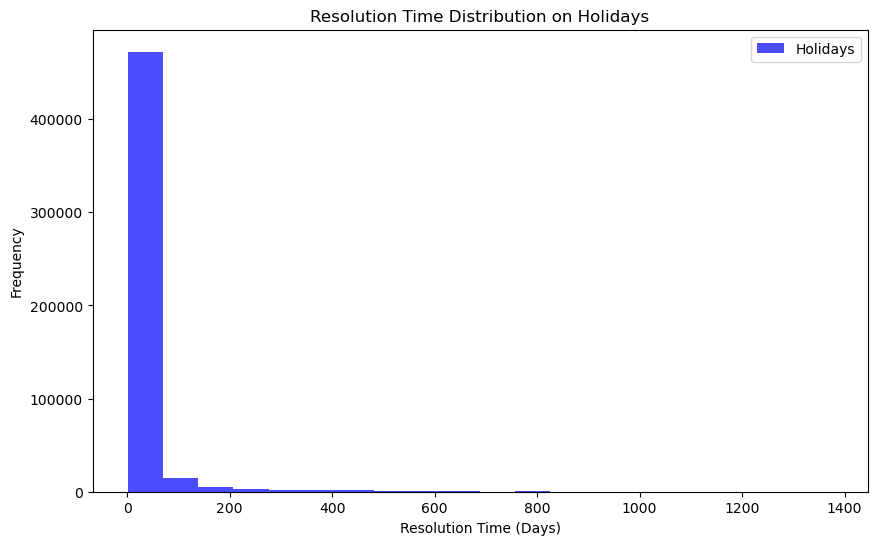

In [71]:
# Task 2: Plot resolution time on holidays
fig, ax = plt.subplots(figsize=(10, 6))

# Filter rows where IS_HOL is 1 (indicating holidays) and plot the histogram
merged_df[merged_df['IS_HOL'] == 1]['Resolution Time'].plot(kind='hist', bins=20, color='blue', alpha=0.7, label='Holidays')

ax.set_title('Resolution Time Distribution on Holidays')
ax.set_xlabel('Resolution Time (Days)')
ax.set_ylabel('Frequency')
ax.legend()

plt.show()

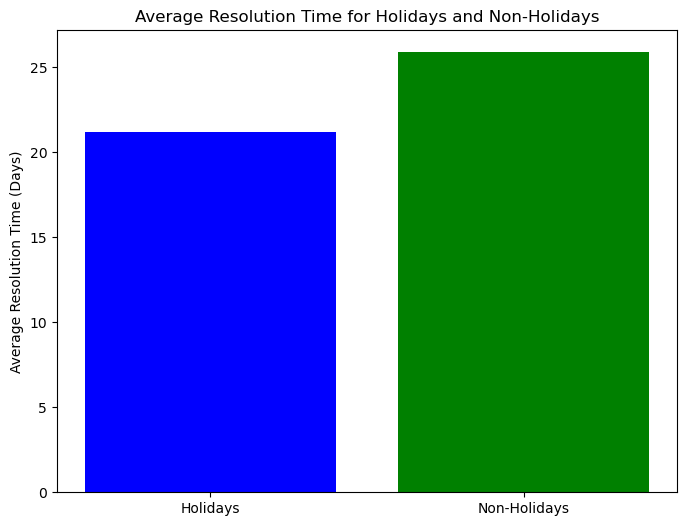

In [72]:
# Calculate average resolution time for holidays and non-holidays
avg_resolution_holidays = merged_df[merged_df['IS_HOL'] == 1]['Resolution Time'].mean()
avg_resolution_non_holidays = merged_df[merged_df['IS_HOL'] == 0]['Resolution Time'].mean()

# Plot average resolution times
fig, ax = plt.subplots(figsize=(8, 6))

ax.bar(['Holidays', 'Non-Holidays'], [avg_resolution_holidays, avg_resolution_non_holidays], color=['blue', 'green'])
ax.set_title('Average Resolution Time for Holidays and Non-Holidays')
ax.set_ylabel('Average Resolution Time (Days)')

plt.show()


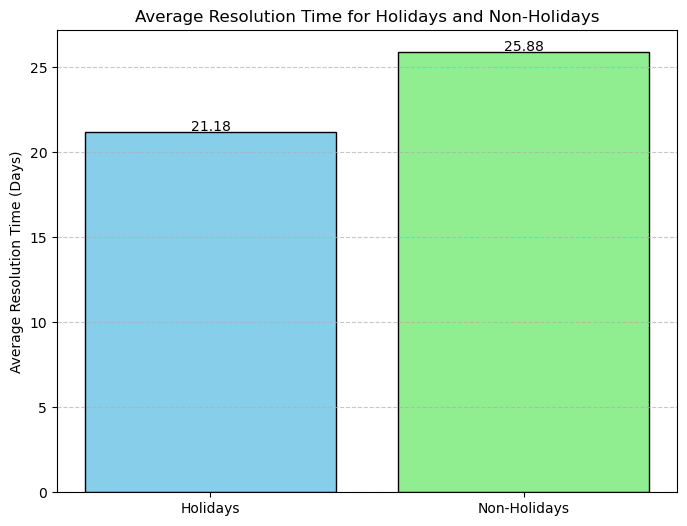

In [73]:
avg_resolution_holidays = merged_df[merged_df['IS_HOL'] == 1]['Resolution Time'].mean()
avg_resolution_non_holidays = merged_df[merged_df['IS_HOL'] == 0]['Resolution Time'].mean()

# Plot average resolution times with improved aesthetics
fig, ax = plt.subplots(figsize=(8, 6))

# Bar chart with custom colors
ax.bar(['Holidays', 'Non-Holidays'], [avg_resolution_holidays, avg_resolution_non_holidays], color=['skyblue', 'lightgreen'], edgecolor='black')

# Adding data labels
for i, v in enumerate([avg_resolution_holidays, avg_resolution_non_holidays]):
    ax.text(i, v + 0.1, f'{v:.2f}', color='black', ha='center')

ax.set_title('Average Resolution Time for Holidays and Non-Holidays')
ax.set_ylabel('Average Resolution Time (Days)')
ax.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()